# Decision trees and random forests

Decision trees build classification or regression models in the form of a tree structure. Creating a binary decision tree is a process of dividing up the input space. A greedy and recursive approach is used to recursively create binary splits in the input space. At each step, all the values are lined up and different split points are tried and tested using a cost function. The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner as the optimal split point is chosen in each step without checking for whether or not the split will lead to the lowest possible cost several levels down. 

In order to make a prediction for a given observation, we typically use the mean (regression) or the mode (classification) of the training observations in the region to which the observation belongs. 

### Classification using decision trees

1. Import the make_moons dataset from sklearn using $100$ samples, noise $= 0.25$ and a fixed random state = $10$.
2. Fit and visualize a decision tree classifier after setting the maximum depth of nodes as $6$. Plot the decision boundaries by calling the helper function plot_decision_boundary provided to you. 
3. Comment on the interpretability of decision trees.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def plot_decision_boundary(tree, X, y, axes=[0, 7.5, 0, 3], legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = tree.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)
        
        


In [3]:
from sklearn.datasets import make_moons
data, target = make_moons(noise=0.25, random_state=53, n_samples= 100)

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


In [5]:
clf  = DecisionTreeClassifier(max_depth=6)

In [6]:
clf = clf.fit(data,target)

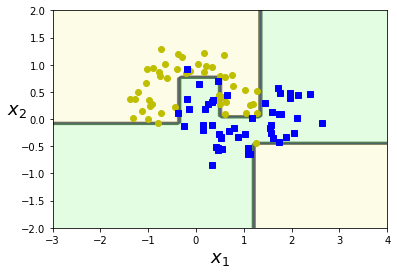

In [7]:
plot_decision_boundary(clf, data, target, axes=[-3,4,-2,2])

Decision trees interpretability is very low as compared to other algorithms

### Overfitting in decision tree classifiers

1. Fit another decision tree classifier on the dataset used above, with no restrictions on the model hyperparameters. Plot the decision boundaries and comment on your observations regarding the overfitting tendency of decision tree classifiers.
2. List and explain in a line or two some of the regularization hyperparameters used while building a decision tree and why they might help reduce overfitting of a decision tree model.
3. Now fit a decision tree classifier on the same dataset using the min_samples_leaf hyperparameter set to $4$. Plot the decision boundaries and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

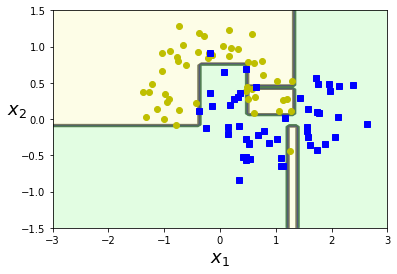

In [8]:
clf  = DecisionTreeClassifier()
clf = clf.fit(data,target)
plot_decision_boundary(clf, data, target, axes=[-3,3,-1.5,1.5])

criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting

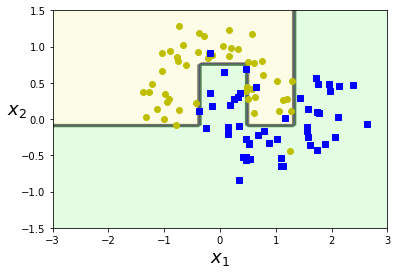

In [9]:
clf  = DecisionTreeClassifier(min_samples_leaf=4)
clf = clf.fit(data,target)
plot_decision_boundary(clf, data, target, axes=[-3,3,-1.5,1.5])

Model 3 performs better on test data as model 1 does overfitting whcih will will give uou less train error but huge test error.

### Instability of decision trees

1. Generate 100 points ($[x1, x2]$) in the 2D plane using np.random.rand() for $(-0.5)<x1<0.5$ and $(-0.5)<x2<0.5$ .  
2. Assign a label of $1$ to all points having $x1>0.0$ and $0$ otherwise. The dataset can now be easily classified using a straight line parallel to the $x2$ axis. 
3. Fit a decision tree classifier on the above obtained dataset ($D1$) and plot the decision boundary.
4. Now rotate the dataset by $45^{\circ}$in the $[x1,x2]$ plane by suitably multiplying the $100$ points by a rotation matrix.
5. Fit a decision tree classifier on the above obtained dataset ($D2$) and plot the decision boundary.
6. The two datasets obtained above are essentially rotated versions of each other. Comment on the changed decision boundaries of the fit decision trees. Although both the decision trees fit the training datset (D1 and D2) perfectly, which decision tree do you think will generalize better on the test dataset?
7. Conclude about the sensitivity of decision trees to rotation of training data and give reasons for the same.
8. Mention one technique that can result in a better orientation of the training dataset.

In [10]:
array  = np.random.rand(100,2)

In [11]:
array =  array - 0.5

In [12]:
label = []
for i in array[:,0]:
    if i>0:
        la = 1
    else:
        la = 0
    label.append(la)

In [13]:
clf  = DecisionTreeClassifier()
clf = clf.fit(array,label)

In [14]:
label = np.asarray(label)

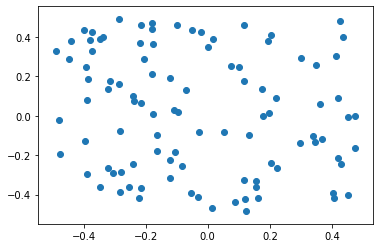

In [15]:
plt.scatter(array[:,0],array[:,1])

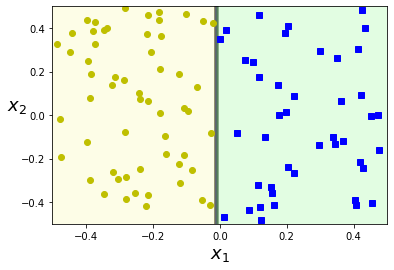

In [16]:
plot_decision_boundary(clf, array, label, axes =[-0.5,0.5,-0.5,0.5])

In [17]:
array = array.T

In [18]:
matrix = [[1,1],[-1,1]]

In [19]:
array = np.matmul(matrix, array)

In [20]:
array = array.T

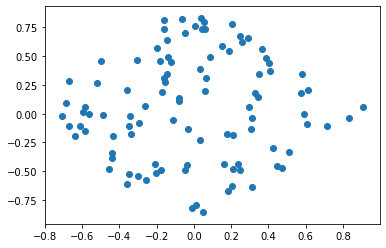

In [21]:
plt.scatter(array[:,0],array[:,1])

In [22]:
clf  = DecisionTreeClassifier()
clf = clf.fit(array,label)

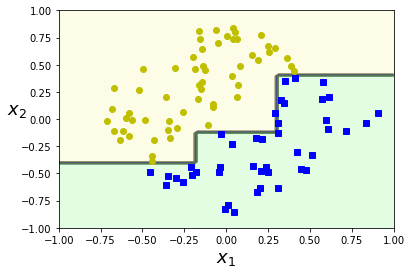

In [23]:
plot_decision_boundary(clf, array, label, axes =[-1,1,-1,1])

The D1 classifier performs much better on the dataset. We observe that there is a drastic change in decision boundaries. This is majorly because the linear classifiers take both value points into consideration and give a label which isn't the case here.DTC is highly sensitive to rotation of matrix. PCA can be a good technique that can result in better orientation of dataset as it brings it into orthogonal space

### Linear classifiers vs decision tree classifiers

1. Taking into account the fact that all decision boundary splits are perpendicular to the input axes, give an example of a dataset where : <br>
a. The linear classifier outperforms the decision tree classifier -- **D2 Dataset** <br>  
b. The decision tree classifier outperforms the linear classifier -- **Moons Dataset** <br> 
For ease of visualizing, your datasets can contain 2D points having two labels : $0$ and $1$. Plot the points such that all points having the same label are of the same colour.


**Linear classifer outperforms DTC when there is low noise and has a strong linear relations ship. DTC performs better when there is non linearity.**

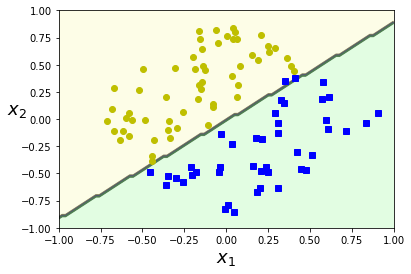

In [24]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(array, label)
plot_decision_boundary(clf, array, label, axes =[-1,1,-1,1])

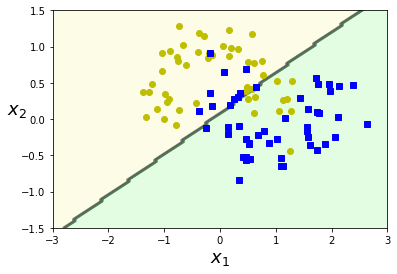

In [25]:
clf = SVC(kernel='linear')
clf.fit(data, target)
plot_decision_boundary(clf, data, target, axes=[-3,3,-1.5,1.5])

### Regression using decision trees

1. Train a regression tree on the noisy quadratic dataset given below with three different max_depth values : $2, 3$ and $4$.
2. Plot the divisions of the input space and the predicted value in each division of the input space using the helper function plot_regression_predictions provided to you below for each regression tree model in (1).

In [26]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

#Quadratic + noise training set 
np.random.seed(10)
X = np.random.rand(150, 1)
y = 4 * (X - 0.5) ** 2 + np.random.randn(150, 1) / 10

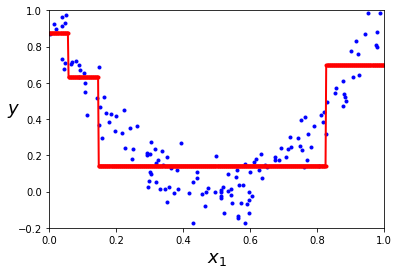

In [27]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=2)
clf.fit(X,y)
plot_regression_predictions(clf, X,y)

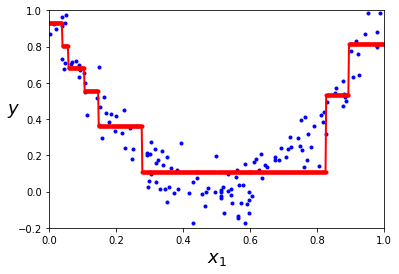

In [28]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=3)
clf.fit(X,y)
plot_regression_predictions(clf, X,y)

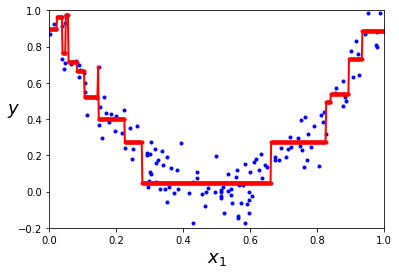

In [29]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X,y)
plot_regression_predictions(clf, X,y)

### Overfitting in regression trees

1. Fit another regression tree on the dataset used above, with no restrictions on the regularization hyperparameters of the model. Plot the predicted value in all input space divisions.
2. What do you observe? Do regression trees too have a tendency to overfit if no regularization is applied? 
3. Now fit a regression tree on the same dataset using the min_samples_leaf hyperparameter set to $10$. Plot the predicted value in all input space divisions and compare with the model fit in (1). Which model ($1$ vs $3$) do you think will generalize better to the test dataset? 

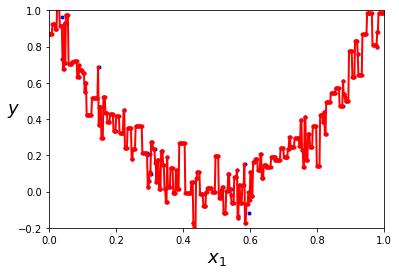

In [30]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(X,y)
plot_regression_predictions(clf, X,y)

Yes, they also tend to overfit the data to a huge extent.

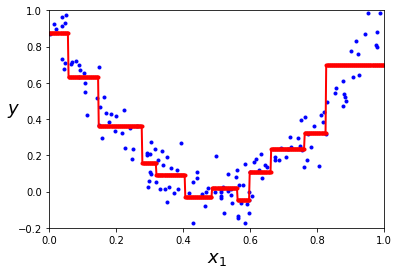

In [31]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor(min_samples_leaf=10)
clf.fit(X,y)
plot_regression_predictions(clf, X,y)

Model 3 performs much better on test data as it fits the data perfectly

### Fine-tuning a decision tree 

1. Generate a moons dataset using make_moons (n_samples=$10000$, noise=$0.4$). 
2. Split it into a training set and a test set. 
3. Use grid search with cross-validation (with the help of GridSearchCV) to find good hyperparameter values for max_leaf_nodes and min_samples_split. Try values ranging from $2$ to $30$ for max_leaf_nodes and $2$ to $6$ for min_samples_split. Report the optimal hyperparameter values.
4. Train the decision tree classifier on the full training set using these optimal hyperparameters, and report your model's performance on the test set.

In [32]:
data, target = make_moons(noise=0.4, n_samples= 10000)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=42)


In [34]:
from sklearn.model_selection import GridSearchCV
grid = [{'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],'min_samples_split': [2,3,4,5,6]}]
clf = GridSearchCV(estimator = DecisionTreeClassifier(), cv = 5, param_grid=grid, n_jobs=-1)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 

In [35]:
import pandas as pd
rank = clf.cv_results_['rank_test_score']
parameters = clf.cv_results_['params']
acc = clf.cv_results_['mean_test_score']
result = pd.DataFrame({'Rank':rank,'Model Params':parameters,'Score':acc})
result = result.sort_values(by='Rank',axis=0)
result[:1][:]

,Rank,Model Params,Score
69,1,"{'max_leaf_nodes': 15, 'min_samples_split': 6}",0.8555


In [36]:
clf = DecisionTreeClassifier(max_leaf_nodes= 15, min_samples_split= 6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[813, 187],
       [104, 896]])

In [37]:
y_pred = y_pred.reshape(2000,1)
y_test = y_test.reshape(2000,1)
clf.score(X_test, y_test)

0.8545

### Growing a random forest classifier

1. Continuing the previous exercise, generate $1,000$ subsets of the training set, each containing 100 instances selected randomly. You can use sklearn.model_selection.ShuffleSplit for this. Contrary to other cross-validation strategies, random splits in ShuffleSplit do not guarantee that all folds will be different.
2. Train one Decision Tree on each subset, using the best hyperparameter values found above. Evaluate these 1,000 Decision Trees on the test set created in ($2$) of the previous problem. How do you expect these decision trees to perform as compared to the first decision tree? Give reasons. Report the mean of accuracy scores of the 1000 trees.
3. For each test set instance, generate the predictions of the $1,000$ Decision Trees, and keep only the most frequent prediction. This gives you majority-vote predictions over the test set.
4. Evaluate these predictions on the test set and report the change in accuracy change as compared to that of the single decision tree.  

**Answers**
1.I guess decision trees should perform worser as we have taken very less data to fit the model. The train size is much less than test size.

In [44]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1000, train_size=100)

In [46]:
data = {}
i = 0
for train, test in rs.split(X_train, y_train):
    data["x"+str(i)] = X_train[train]
    data["y"+str(i)] = y_train[train]
    i = i+1

In [50]:
score = []
for i in range(0,1000):
    clf = DecisionTreeClassifier(max_leaf_nodes= 15, min_samples_split= 6)
    clf.fit(data["x"+str(i)], data["y"+str(i)])
    sc = clf.score(X_test, y_test)
    score.append(sc)

In [53]:
mean_score = np.mean(score)
print(mean_score)

0.7989250000000001


In [69]:
from scipy import stats
pred = np.zeros(2000)
for i in range(0,1000):
    clf = DecisionTreeClassifier(max_leaf_nodes= 15, min_samples_split= 6)
    clf.fit(data["x"+str(i)], data["y"+str(i)])
    y_pred = clf.predict(X_test)
    pred = np.vstack([pred,y_pred])

In [70]:
pred = np.delete(pred, 0, axis = 0)

In [89]:
from statistics import mode 
mode_pred = []
for i in range(0,2000):
    mod = mode(pred[:,i])
    mode_pred.append(mod)

In [90]:
mode_pred = np.asarray(mode_pred)
mode_pred.shape

(2000,)

In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, mode_pred)

0.8625